# Spaceship Titanic Kaggle Competition Notebook

by **Neel Chudasama**

## Table of contents
1. [Overview](#overview)
2. [Goal](#goal)
3. [Notebook](#notebook)
    1. [Importing libraries and Loading in Data](#importing)
4. [Data Description](#dd)
5. [Data Cleaning](#ex)
    1. [Exploring the HomePlanet Column](#ex2)
    2. [Exploring the CryoSleep Column](#ex3)
    3. [Exploring the Cabin Column](#ex4)
    4. [Exploring the Destination Column](#ex5)
    5. [Exploring the Age Column](#ex6)
    6. [Exploring the VIP Column](#ex7)
    7. [Exploring the RoomService Column](#ex8)
    8. [Exploring foodcourt, shoppingmall, spa and vrdeck columns](#ex9)
6. [EDA of the Dataframe](#dc)
    1. [Visualising the Target feature : Transported](#dc1)
    2. [Visualising the Age Feature](#dc2)
    3. [Visualising the amenety features (RoomService, FoodCourt, ShoppingMall, Spa, VRDeck)](#dc3)
    4. [Visualizing Categorical Features (HomePlanet, CryoSleep, Destination, VIP)](#dc4)
7. [Feature Creation](#fc)
    1. [Data Preprocessing](#fc1)
8. [Modelling](#md)
    1. [Machine Learning Models](#md1)
    2. [Explore XGBoost classifier model](#md2)
    3. [Formatting final predictions](#md3)
9. [Conclusion](#cc)

## Overview <a name="overview"></a>

Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

To help rescue crews and retrieve the lost passengers, I am challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.

## Goal <a name="goal"></a>

In this notebook, I will conduct a Binary Classification on the Titanic Spaceship Dataset (which can be found here: https://www.kaggle.com/competitions/spaceship-titanic/data) to predict whether a person will be transported to an alternative dimension or not.

## Notebook <a name="notebook"></a>

### Importing libraries and Loading in Data <a name="importing"></a>

These are the necessary libraries needed to conduct my analysis and modelling predictions. 

*capstone_utils* is a utils file I created to assist with my exploraration and prediction of the data to make this notebook more aesthetic to look at. 

In [1135]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import numpy as np
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler

import capstone_utils
import warnings
warnings.filterwarnings('ignore')

In [1136]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
test_df_copy = test_df.copy()
sub = pd.read_csv("sample_submission.csv")

**train_df** : Personal records for about two-thirds (~8700) of the passengers, to be used as training data.

**test_df** : Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Task is to predict the value of Transported for the passengers in this set.

**sub** : A submission file in the correct format.

In [1137]:
#saving the passenger id data for to be able to ensure that the predictions were in the correct format
passengers = test_df['PassengerId']

## Data Description <a name="dd"></a>

- **PassengerId** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
- **HomePlanet** - The planet the passenger departed from, typically their planet of permanent residence.
- **CryoSleep** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- **Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
- **Destination** - The planet the passenger will be debarking to.
- **Age** - The age of the passenger.
- **VIP** - Whether the passenger has paid for special VIP service during the voyage.
- **RoomService**, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- **Name** - The first and last names of the passenger.
- **Transported** - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

## Data Cleaning

Utilising my utils functions, I want to be able to explore the data to gain an initial understand of the cleaning steps that need to be taken.

In [1138]:
capstone_utils.eda(train_df)


Rows: 8693 	 Columns: 14

Total null rows: 2324
Percentage null rows: 26.73%

Total duplicate rows: 0
Percentage dupe rows: 0.0%

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object
-----


The head of the dataframe is: 


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True



The tail of the dataframe is:


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True



Description of the numerical columns is as follows


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


From the information printed above, I can see that there are multiple null values in the dataframe which will need to be adressed, however, there are no duplicate values in the dataframe. There are a quite a few categorical columns in the dataframe which will need to be adressed. Either through binary encoding or one hot dummy encoding. Finally, There are a few numerical columns in the dataframe, with the expenditure columns all quite similar in values. 

In [1139]:
capstone_utils.eda(test_df)


Rows: 4277 	 Columns: 13

Total null rows: 1117
Percentage null rows: 26.12%

Total duplicate rows: 0
Percentage dupe rows: 0.0%

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
dtype: object
-----


The head of the dataframe is: 


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez



The tail of the dataframe is:


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale
4276,9277_01,Earth,True,G/1498/S,PSO J318.5-22,43.0,False,0.0,0.0,0.0,0.0,0.0,Lilace Leonzaley



Description of the numerical columns is as follows


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


There is nothing else to add about the test dataframe other than the fact that there seems to be the same proportion of null values in the dataframe like the training dataframe.

One thing to note is that whatever wrangling or manipulation is applied to the training dataset will also be applied to the test dataset as well to ensure consistency. 

In [1140]:
#binarising the whole dataframe to make manipulation easier

train_df = train_df.replace({True: 1, False: 0})
test_df = test_df.replace({True: 1, False: 0})

### Exploring the HomePlanet Column

In [1141]:
print("There are " +str(train_df['HomePlanet'].isna().sum()) + " NA values in the HomePlanet column in the training dataframe")
print("There are " +str(test_df['HomePlanet'].isna().sum()) + " NA values in the HomePlanet column in the testing dataframe")

There are 201 NA values in the HomePlanet column in the training dataframe
There are 87 NA values in the HomePlanet column in the testing dataframe


In [1142]:
train_df['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

**Observation**  
💡 Looking at the unique values, there are only three categories for the HomePlanet column : Europa, Earth, Mars.

I want to explore if there is a connection between the PassengerId and HomePlanet column, so that I can fill in the NA values in this HomePlanet column.

In [1143]:
home_nulls = train_df[train_df['HomePlanet'].isnull()]

In [1144]:
group_code = []
for i in home_nulls['PassengerId']:
    group_code.append(i[:4])   

In [1145]:
home_planet_dict = {}
nans = {}

for j in range(0,len(group_code)):
    matching_rows = train_df[train_df['PassengerId'].str.contains(group_code[j], case=False, na=False)]
    if len(matching_rows) != 1 and matching_rows['HomePlanet'].isna().all() == False:
        non_nan_value = matching_rows['HomePlanet'].dropna().iloc[0]
        home_planet_dict[group_code[j]] = non_nan_value
    else:
        nans[j] = group_code[j]


In [1146]:
for key, value in home_planet_dict.items():
    train_df.loc[train_df['PassengerId'].str.contains(key), 'HomePlanet'] = value


**Observation**  
💡 Referring to the data description, the first four digits of the PassengerId column refers to the group that the passenger is in. I was able to confirm that passengers that were travelling in the same group also travelled from the same homeplanet and destination. This would help me assist in the cases where there NA values in some members of the group but not in others, I was able to use this method to impute some of the NA values. 

In [1147]:
home_test_nulls = test_df[test_df['HomePlanet'].isnull()]

In [1148]:
group_code_test = []
for i in home_test_nulls['PassengerId']:
    group_code_test.append(i[:4])   

In [1149]:
home_planet_dict_test = {}
nans_test = {}

for j in range(0,len(group_code_test)):
    matching_rows = test_df[test_df['PassengerId'].str.contains(group_code_test[j], case=False, na=False)]
    if len(matching_rows) != 1 and matching_rows['HomePlanet'].isna().all() == False:
        non_nan_value = matching_rows['HomePlanet'].dropna().iloc[0]
        home_planet_dict_test[group_code_test[j]] = non_nan_value
    else:
        nans_test[j] = group_code_test[j]


In [1150]:
for key, value in home_planet_dict_test.items():
    test_df.loc[test_df['PassengerId'].str.contains(key), 'HomePlanet'] = value

In [1151]:
print("There are " +str(train_df['HomePlanet'].isna().sum()) + " NA values in the HomePlanet column in the training dataframe")
print("There are " +str(test_df['HomePlanet'].isna().sum()) + " NA values in the HomePlanet column in the testing dataframe")

There are 111 NA values in the HomePlanet column in the training dataframe
There are 46 NA values in the HomePlanet column in the testing dataframe


Through this method, I was able to reduce the number of NA values in the HomePlanet column as shown above. However, there are still more in the HomePlanet I want to combat and impute.

In [1152]:
# Apply the function to the DataFrame
train_df['HomePlanet'] = train_df.apply(lambda row : capstone_utils.impute_europa(row) if pd.notna(row["Cabin"]) else row['HomePlanet'], axis=1)
test_df['HomePlanet'] = test_df.apply(lambda row : capstone_utils.impute_europa(row) if pd.notna(row["Cabin"]) else row['HomePlanet'], axis=1)

In [1153]:
# Apply the function to the DataFrame
train_df['HomePlanet'] = train_df.apply(lambda row : capstone_utils.impute_earth(row) if pd.notna(row["Cabin"]) else row['HomePlanet'], axis=1)
test_df['HomePlanet'] = test_df.apply(lambda row : capstone_utils.impute_earth(row) if pd.notna(row["Cabin"]) else row['HomePlanet'], axis=1)

In [1154]:
print("There are " +str(train_df['HomePlanet'].isna().sum()) + " NA values in the HomePlanet column in the training dataframe")
print("There are " +str(test_df['HomePlanet'].isna().sum()) + " NA values in the HomePlanet column in the testing dataframe")

There are 63 NA values in the HomePlanet column in the training dataframe
There are 31 NA values in the HomePlanet column in the testing dataframe


**Observation**  
💡 I found that there was a link between the Cabin and the passengers HomePlanet. I found that if a passenger was travelling in a ertain cabin it dictated which planet they were travelling from, which helped me to impute some more NA values. However, there were still NA values I was not able to impute so I have decided to impute the rest of the NA values with the most frequent value in the column.

In [1155]:
from sklearn.impute import SimpleImputer

imputer1 = SimpleImputer(strategy="most_frequent")     
train_df['HomePlanet'] = imputer1.fit_transform(train_df['HomePlanet'].values.reshape(-1, 1)).ravel()
test_df['HomePlanet'] = imputer1.fit_transform(test_df['HomePlanet'].values.reshape(-1, 1)).ravel()

In [1156]:
print("There are " +str(train_df['HomePlanet'].isna().sum()) + " NA values in the HomePlanet column in the training dataframe")
print("There are " +str(test_df['HomePlanet'].isna().sum()) + " NA values in the HomePlanet column in the testing dataframe")

There are 0 NA values in the HomePlanet column in the training dataframe
There are 0 NA values in the HomePlanet column in the testing dataframe


### Exploring the Cryosleep Column

I wanted explore how much Cryosleep had an effect on certain values, my initial assumption is that those in VIP may have opted for cryosleep given that it may be an extra add on feature. Furthermore, I also had an assumption that given that passengers opted for Cryosleep, they may be travelling far distances and wanted to go to sleep so that they don't have to deal with the journey. Lastly, I also had an assumption that passengers that opted for Cryosleep were very unlikely to have spent any money on the trip given the fact that they were asleep the whole time so I wanted to confirm this.

In [1157]:
cryo_na = train_df[train_df['CryoSleep'].isna()]
cryo_na['Destination'].value_counts()

Destination
TRAPPIST-1e      150
55 Cancri e       44
PSO J318.5-22     19
Name: count, dtype: int64

In [1158]:
cryo_na['VIP'].value_counts()

VIP
0.0    207
1.0      3
Name: count, dtype: int64

In [1159]:
train_df[train_df['CryoSleep']==True][['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].value_counts()

RoomService  FoodCourt  ShoppingMall  Spa  VRDeck
0.0          0.0        0.0           0.0  0.0       2690
Name: count, dtype: int64

In [1160]:
train_df[(train_df['CryoSleep']==False)&(train_df['RoomService']==0)&(train_df['FoodCourt']==0)&(train_df['ShoppingMall']==0)&(train_df['Spa']==0)&(train_df['VRDeck']==0)]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,0.0,B/0/P,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
19,0017_01,Earth,0.0,G/0/P,TRAPPIST-1e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lyde Brighttt,1
24,0020_04,Earth,0.0,E/0/S,TRAPPIST-1e,10.0,0.0,0.0,0.0,0.0,0.0,0.0,Breney Jacostanley,1
26,0020_06,Earth,0.0,E/0/S,TRAPPIST-1e,7.0,0.0,0.0,0.0,0.0,0.0,0.0,Terta Mcfaddennon,0
34,0031_02,Mars,0.0,F/9/P,TRAPPIST-1e,2.0,0.0,0.0,0.0,0.0,0.0,0.0,Cinets Datie,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8577,9157_06,Earth,0.0,G/1476/S,TRAPPIST-1e,12.0,0.0,0.0,0.0,0.0,0.0,0.0,Pamont Navages,0
8637,9219_01,Earth,0.0,G/1487/S,55 Cancri e,9.0,0.0,0.0,0.0,0.0,0.0,0.0,Daley Workmanson,0
8654,9231_02,Mars,0.0,F/1888/P,TRAPPIST-1e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Walls Paie,1
8655,9231_03,Mars,0.0,E/592/P,TRAPPIST-1e,22.0,0.0,0.0,0.0,0.0,0.0,0.0,Cus Paie,0


My assumptions were correct that passengers who were in Cryosleep did not spend any money but it is hard to be able to determine that all passengers who spent no money on those facilities were in cryoslee, as shown by the datafram above. Furthermore, there could be a case that users who travelled in VIP did not travel via Cryosleep but there is not enough of a link to declare that wholeheartedly. 

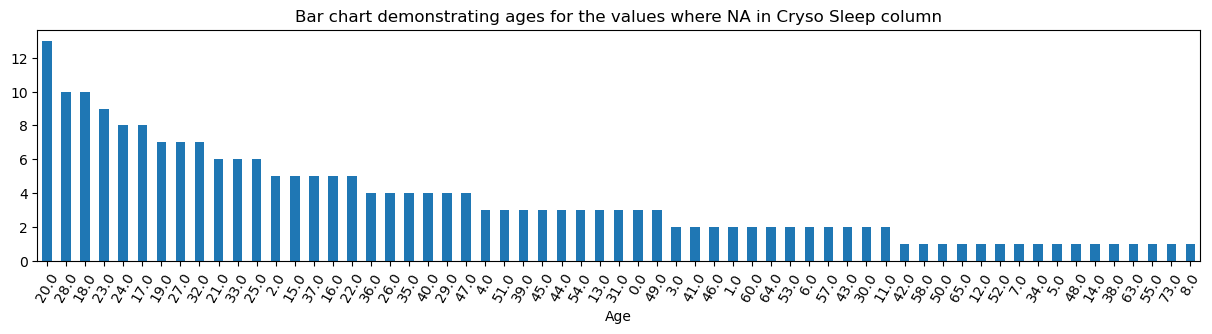

In [1161]:
cryo_na['Age'].value_counts().plot(kind = 'bar', figsize = (15,3), title = "Bar chart demonstrating ages for the values where NA in Cryso Sleep column")
plt.xticks(rotation = 60)
plt.show()

I wanted to explore whether age had an effect on Cryosleep and it does not, as there are NA values for cryosleep for all ages. I thought that a certain age group has NA values in it but that is not the case. 

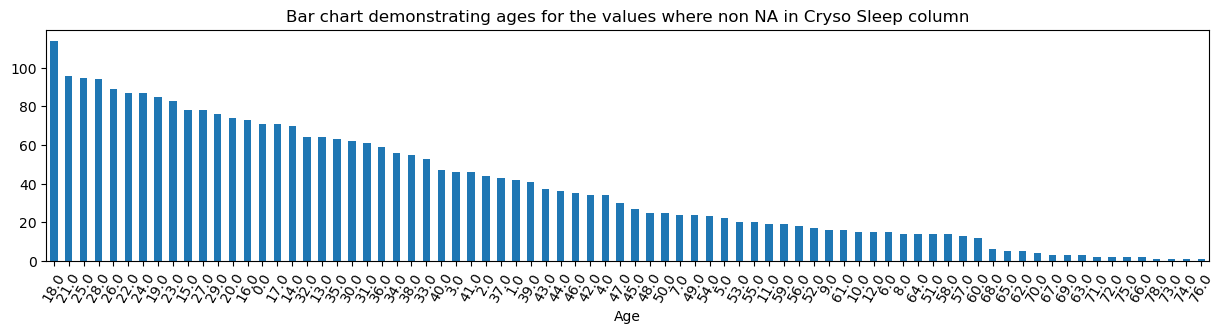

In [1162]:
cryo_true = train_df[train_df['CryoSleep']==True]

cryo_true['Age'].value_counts().plot(kind = 'bar', figsize = (15,3), title = "Bar chart demonstrating ages for the values where non NA in Cryso Sleep column")
plt.xticks(rotation = 60)
plt.show()

**Observation**  
💡 It seems that there are a large numbe of passengers on the younger side of the spectrum who are opting for Cryosleep but there is not enough of a link to confirm this for sure.

In [1163]:
cryo_sleep_cabin = []

for i in train_df[(train_df['CryoSleep']==True)]['Cabin']:
    if pd.isna(i):
        pass
    else:
        cryo_sleep_cabin.append(i[0])

In [1164]:
unique_val = set(cryo_sleep_cabin)
print(unique_val)

{'G', 'E', 'F', 'A', 'B', 'C', 'D'}


In [1165]:
false_cryo_sleep_cabin = []

for i in train_df[(train_df['CryoSleep']==False)]['Cabin']:
    if pd.isna(i):
        pass
    else:
        false_cryo_sleep_cabin.append(i[0])

In [1166]:
unique_val = set(false_cryo_sleep_cabin)
print(unique_val)

{'G', 'E', 'F', 'A', 'B', 'C', 'T', 'D'}


**Observation**  
💡 People that did not travel via CryoSleep stayed in the same cabins as those in the CryoSleep, apart from one cabin. The T cabin seems to be only for that travelled in CryoSleep. With this information, I can use this to impute some of the NA values in the CryoSleep column.

In [1167]:
# Apply the function to the DataFrame
train_df['CryoSleep'] = train_df.apply(lambda row : capstone_utils.impute_cryo(row) if pd.notna(row["Cabin"]) else row['CryoSleep'], axis=1)
test_df['CryoSleep'] = test_df.apply(lambda row : capstone_utils.impute_cryo(row) if pd.notna(row["Cabin"]) else row['CryoSleep'], axis=1)

I have explored every way of imputing the NA values in the dataframe so I will impute the most frequent value for the rest of the NA values in the column.

In [1168]:
train_df['CryoSleep'].fillna(train_df['CryoSleep'].mode()[0],inplace = True)
test_df['CryoSleep'].fillna(test_df['CryoSleep'].mode()[0],inplace = True)

In [1169]:
print("There are " +str(train_df['CryoSleep'].isna().sum()) + " NA values in the CryoSleep column in the training dataframe")
print("There are " +str(test_df['CryoSleep'].isna().sum()) + " NA values in the CryoSleep column in the testing dataframe")

There are 0 NA values in the CryoSleep column in the training dataframe
There are 0 NA values in the CryoSleep column in the testing dataframe


### Exploring the Cabin Column

In [1170]:
print("There are " +str(train_df['Cabin'].isna().sum()) + " NA values in the Cabin column in the training dataframe")
print("There are " +str(test_df['Cabin'].isna().sum()) + " NA values in the Cabin column in the testing dataframe")

There are 199 NA values in the Cabin column in the training dataframe
There are 100 NA values in the Cabin column in the testing dataframe


In [1171]:
cabin_na = train_df[train_df['Cabin'].isna()]
cabin_non_na = train_df[train_df["Cabin"].notna()]

**Observation**  
💡 If people are in the same group they share the same cabin, I will try to loop through to make sure that is the case before I use this method to impute the NA values wherever possible.

In [1172]:
cabin_code = []
for i in cabin_na['PassengerId']:
    cabin_code.append(i[:4])  

In [1173]:
cabin_dict = {}
dic_nans = {}

for j in range(0,len(cabin_code)):
    matching_rows = train_df[train_df['PassengerId'].str.contains(cabin_code[j], case=False, na=False)]
    if len(matching_rows) != 1 and matching_rows['Cabin'].isna().all() == False:
        non_nan_value = matching_rows['Cabin'].dropna().iloc[0]
        cabin_dict[cabin_code[j]] = non_nan_value
    else:
        dic_nans[j] = cabin_code[j]

In [1174]:
cabin_na_test = test_df[test_df['Cabin'].isna()]
cabin_non_na_test = test_df[test_df["Cabin"].notna()]

In [1175]:
cabin_code_test = []
for i in cabin_na_test['PassengerId']:
    cabin_code_test.append(i[:4])  

In [1176]:
cabin_dict_test = {}
dic_nans_test = {}

for j in range(0,len(cabin_code_test)):
    matching_rows = test_df[test_df['PassengerId'].str.contains(cabin_code_test[j], case=False, na=False)]
    if len(matching_rows) != 1 and matching_rows['Cabin'].isna().all() == False:
        non_nan_value = matching_rows['Cabin'].dropna().iloc[0]
        cabin_dict_test[cabin_code_test[j]] = non_nan_value
    else:
        dic_nans_test[j] = cabin_code_test[j]

In [1177]:
for key, value in cabin_dict.items():
    train_df.loc[train_df['PassengerId'].str.contains(key), 'Cabin'] = value

In [1178]:
for key, value in cabin_dict_test.items():
    test_df.loc[test_df['PassengerId'].str.contains(key), 'Cabin'] = value

In [1179]:
print("There are " +str(train_df['Cabin'].isna().sum()) + " NA values in the Cabin column in the training dataframe")
print("There are " +str(test_df['Cabin'].isna().sum()) + " NA values in the Cabin column in the testing dataframe")

There are 99 NA values in the Cabin column in the training dataframe
There are 63 NA values in the Cabin column in the testing dataframe


I am unable to fill the NA values in the cabin, so I will use the most frequent value and fill them in with that. 

In [1180]:
train_df['Cabin'].fillna(train_df['Cabin'].mode()[0],inplace = True)
test_df['Cabin'].fillna(test_df['Cabin'].mode()[0],inplace = True)

### Exploring the Destination column

After exploring the HomePlanet column, I have been able to identify a link to the Cabin column as well. I want to explore whether that is the case and help that with my imputation method. 

In [1181]:
print("There are " +str(train_df['Destination'].isna().sum()) + " NA values in the Destination column in the training dataframe")
print("There are " +str(test_df['Destination'].isna().sum()) + " NA values in the Destination column in the testing dataframe")

There are 182 NA values in the Destination column in the training dataframe
There are 92 NA values in the Destination column in the testing dataframe


In [1182]:
train_df['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

There are three destinations that the passenger can travel to : TRAPPIST-1e, PSO J318.5-22, 55 Cancri e. Which helps me to impute the NA values. 

In [1183]:
destination_na = train_df[train_df['Destination'].isna()]
destination_not_na = train_df[(train_df['Destination'].notna())]

In [1184]:
destination_code = []
for i in destination_na['PassengerId']:
    destination_code.append(i[:4])

In [1185]:
des_dict = {}
des_nans = {}

for j in range(0,len(destination_code)):
    matching_rows = train_df[train_df['PassengerId'].str.contains(destination_code[j], case=False, na=False)]
    if len(matching_rows) != 1 and matching_rows['Destination'].isna().all() == False:
        non_nan_value = matching_rows['Destination'].dropna().iloc[0]
        des_dict[destination_code[j]] = non_nan_value
    else:
        des_nans[j] = destination_code[j]

In [1186]:
for key, value in des_dict.items():
    train_df.loc[train_df['PassengerId'].str.contains(key), 'Destination'] = value

In [1187]:
destination_na_test = test_df[test_df['Destination'].isna()]
destination_not_na_test = test_df[(test_df['Destination'].notna())]

In [1188]:
destination_code_test = []
for i in destination_na_test['PassengerId']:
    destination_code_test.append(i[:4])

In [1189]:
des_dict_test = {}
des_nans_test = {}

for j in range(0,len(destination_code_test)):
    matching_rows = test_df[test_df['PassengerId'].str.contains(destination_code_test[j], case=False, na=False)]
    if len(matching_rows) != 1 and matching_rows['Destination'].isna().all() == False:
        non_nan_value = matching_rows['Destination'].dropna().iloc[0]
        des_nans_test[destination_code_test[j]] = non_nan_value
    else:
        des_nans_test[j] = destination_code_test[j]

In [1190]:
for key, value in des_dict_test.items():
    test_df.loc[test_df['PassengerId'].str.contains(key), 'Destination'] = value

**Observation**  
💡 Passengers who are travelling in the same group are also travelling to the same destination as well. 

So utilising this, I am able to impute these NA values for that specific case. Given that I am not able to establish a link between the Destination column and any other column, I will impute with the most frequent value. 

In [1191]:
train_df['Destination'].fillna(train_df['Destination'].mode()[0],inplace = True)
test_df['Destination'].fillna(test_df['Destination'].mode()[0],inplace = True)

In [1192]:
print("There are " +str(train_df['Destination'].isna().sum()) + " NA values in the Destination column in the training dataframe")
print("There are " +str(test_df['Destination'].isna().sum()) + " NA values in the Destination column in the testing dataframe")

There are 0 NA values in the Destination column in the training dataframe
There are 0 NA values in the Destination column in the testing dataframe


### Exploring the Age column

Given that this column is a numerical column, it is very hard to be able to determine an imputing strategy. There were very few connections between certain columns and the Age column but I want to explore this further. 

In [1193]:
print("There are " +str(train_df['Age'].isna().sum()) + " NA values in the Age column in the training dataframe")
print("There are " +str(test_df['Age'].isna().sum()) + " NA values in the Age column in the testing dataframe")

There are 179 NA values in the Age column in the training dataframe
There are 91 NA values in the Age column in the testing dataframe


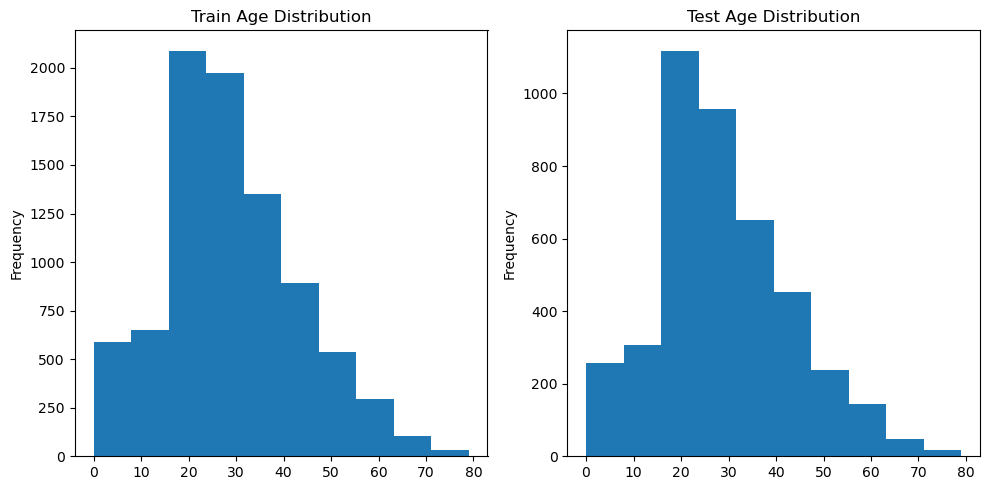

In [1194]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # Create a 1x2 grid of subplots

train_df['Age'].plot(kind='hist', ax=axes[0], title='Train Age Distribution')  # First subplot
test_df['Age'].plot(kind='hist', ax=axes[1], title='Test Age Distribution')  # Second subplot

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

There is not much different between the ages in the train dataset and the test dataset.

Can't seem to find a way to impute, so will use a simple imputer to fill in this data with the median value. 

In [1195]:
imputer2 = SimpleImputer(strategy="median")            ##To fill numeircal features.
train_df['Age'] = imputer1.fit_transform(train_df['Age'].values.reshape(-1, 1)).ravel()
test_df['Age'] = imputer1.fit_transform(test_df['Age'].values.reshape(-1, 1)).ravel()

### Exploring the VIP Column

I have an assumption that those who spent money on a VIP ticket would also spend a lot of money on the other ameneties such as room service etc. I want to see if that is the case and if there is a way to use this information to impute these values into the NA values. 

In [1196]:
print("There are " +str(train_df['VIP'].isna().sum()) + " NA values in the VIP column in the training dataframe")
print("There are " +str(test_df['VIP'].isna().sum()) + " NA values in the VIP column in the testing dataframe")

There are 203 NA values in the VIP column in the training dataframe
There are 93 NA values in the VIP column in the testing dataframe


Through my exploration there are VIP passengers who spent a large amount of money on ameneties but there were also a large that did not spend any money at all, so I am unable to use this as an imputation method.

I have an assumption about whether there is a special cabin for those VIP passengers, however through my exploration this was not the case. So therefore, I am just imputing this column with the most frequent occurring value.

In [1197]:
train_df['VIP'].fillna(train_df['VIP'].mode()[0],inplace = True)
test_df['VIP'].fillna(test_df['VIP'].mode()[0],inplace = True)

### Exploring the RoomService column

I have an assumption that those passengers who were in CryoSleep are asleep for the whole journey so will not be able to order RoomService. With that information I can use that to impute the values. 

In [1198]:
print("There are " +str(train_df['RoomService'].isna().sum()) + " NA values in the RoomService column in the training dataframe")
print("There are " +str(test_df['RoomService'].isna().sum()) + " NA values in the RoomService column in the testing dataframe")

There are 181 NA values in the RoomService column in the training dataframe
There are 82 NA values in the RoomService column in the testing dataframe


In [1199]:
train_df[(train_df['CryoSleep']==True)]['RoomService'].sum()

0.0

**Observation**  
💡 As you can see, that the total value for the RoomService when a passenger is in CryoSleep is 0.

In [1200]:
mask = (train_df['RoomService'].isna()) & (train_df['CryoSleep'] == True)
train_df.loc[mask, 'RoomService'] = 0

In [1201]:
mask = (test_df['RoomService'].isna()) & (test_df['CryoSleep'] == True)
test_df.loc[mask, 'RoomService'] = 0

Given that there still NA values in this column, I have no other way of doing it other than imputing using the median value in the dataframe. 

In [1202]:
imputer2 = SimpleImputer(strategy="median")            ##To fill numeircal features.
train_df['RoomService'] = imputer1.fit_transform(train_df['RoomService'].values.reshape(-1, 1)).ravel()
test_df['RoomService'] = imputer1.fit_transform(test_df['RoomService'].values.reshape(-1, 1)).ravel()

In [1203]:
print("There are " +str(train_df['RoomService'].isna().sum()) + " NA values in the RoomService column in the training dataframe")
print("There are " +str(test_df['RoomService'].isna().sum()) + " NA values in the RoomService column in the testing dataframe")

There are 0 NA values in the RoomService column in the training dataframe
There are 0 NA values in the RoomService column in the testing dataframe


### Exploring foodcourt, shoppingmall, spa and vrdeck columns

These columns follow the same method as the RoomService column so I will impute using the same strategy and finally imputing using the median value. 

In [1204]:
cols = ['FoodCourt','ShoppingMall','Spa','VRDeck']

for column in cols:
    print("There are " +str(train_df[column].isna().sum()) + " NA values in the "+column+ " column in the training dataframe")
    print("There are " +str(test_df[column].isna().sum()) + " NA values in the "+ column + " column in the testing dataframe")

There are 183 NA values in the FoodCourt column in the training dataframe
There are 106 NA values in the FoodCourt column in the testing dataframe
There are 208 NA values in the ShoppingMall column in the training dataframe
There are 98 NA values in the ShoppingMall column in the testing dataframe
There are 183 NA values in the Spa column in the training dataframe
There are 101 NA values in the Spa column in the testing dataframe
There are 188 NA values in the VRDeck column in the training dataframe
There are 80 NA values in the VRDeck column in the testing dataframe


In [1205]:
for i in cols:
    mask = (train_df[i].isna()) & (train_df['CryoSleep'] == True)
    train_df.loc[mask, i] = 0
    mask = (test_df[i].isna()) & (test_df['CryoSleep'] == True)
    test_df.loc[mask, i] = 0

Imputing these columns with the median value. 

In [1206]:
imputer2 = SimpleImputer(strategy="median")            ##To fill numeircal features.
for cols in cols:
    train_df[cols] = imputer1.fit_transform(train_df[cols].values.reshape(-1, 1)).ravel()
    test_df[cols] = imputer1.fit_transform(test_df[cols].values.reshape(-1, 1)).ravel()

In [1207]:
cols = ['FoodCourt','ShoppingMall','Spa','VRDeck']

for column in cols:
    print("There are " +str(train_df[column].isna().sum()) + " NA values in the "+column+ " column in the training dataframe")
    print("There are " +str(test_df[column].isna().sum()) + " NA values in the "+ column + " column in the testing dataframe")

There are 0 NA values in the FoodCourt column in the training dataframe
There are 0 NA values in the FoodCourt column in the testing dataframe
There are 0 NA values in the ShoppingMall column in the training dataframe
There are 0 NA values in the ShoppingMall column in the testing dataframe
There are 0 NA values in the Spa column in the training dataframe
There are 0 NA values in the Spa column in the testing dataframe
There are 0 NA values in the VRDeck column in the training dataframe
There are 0 NA values in the VRDeck column in the testing dataframe


## EDA of the Dataframe

I have already conducted some EDA of the dataframe, but I want to go more in-depth and see if I can visualise the dataframe to determine any relationships between columns which will assist with my modelling. 

### Visualising the Target feature : Transported

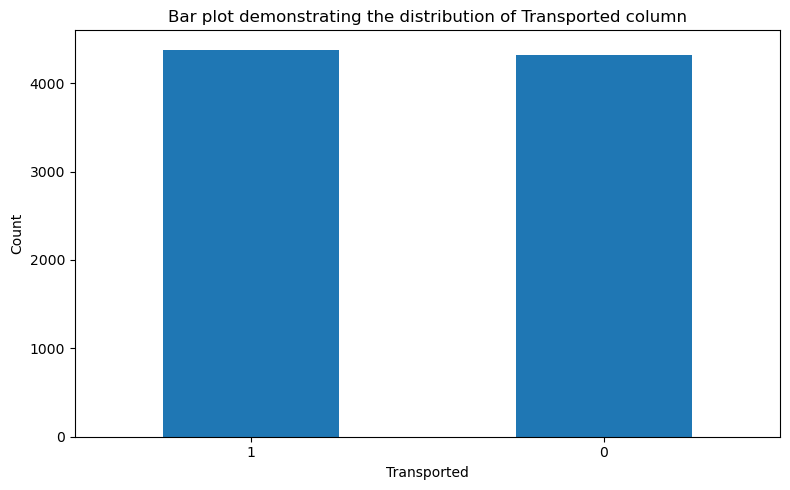

In [1208]:
train_df['Transported'].value_counts().plot(kind = 'bar',figsize=(8,5))
plt.title("Bar plot demonstrating the distribution of Transported column")
plt.ylabel("Count")
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

**Observation**  
💡 We can observe that our Transported Feature is highly balanced.  
💡 So we don't have to use techniques like under_sampling or over_sampling


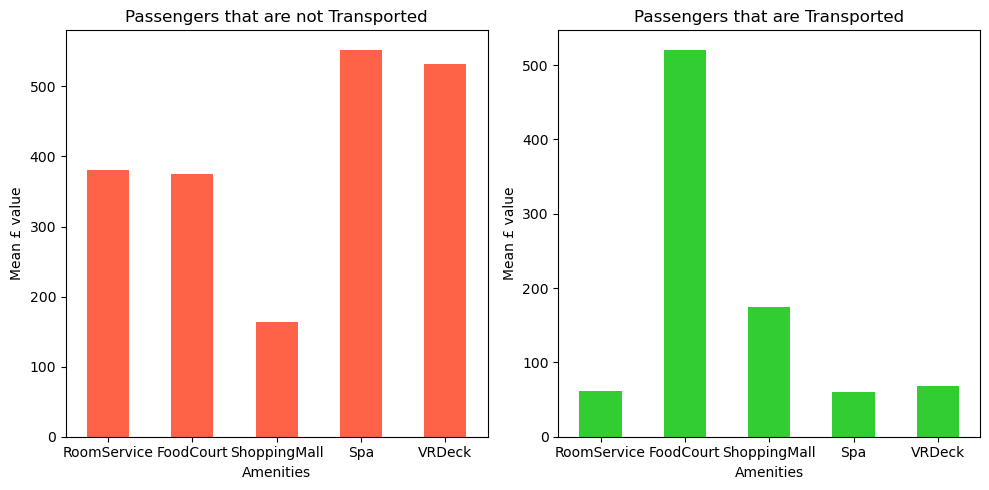

In [1209]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # Create a 1x2 grid of subplots
train_df[(train_df["Transported"]==0)][['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].mean().plot(kind = 'bar',ax=axes[0], title='Passengers that are not Transported', color = 'tomato')
axes[0].tick_params(axis='x', rotation=0)  
axes[0].set_xlabel("Amenities")
axes[0].set_ylabel("Mean £ value")  
train_df[(train_df["Transported"]==1)][['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].mean().plot(kind = 'bar',ax=axes[1], title='Passengers that are Transported', color = 'limegreen')
axes[1].tick_params(axis='x', rotation=0)  
axes[1].set_xlabel("Amenities")
axes[1].set_ylabel("Mean £ value")  
plt.tight_layout()  
plt.show()

I wanted to explore whether people that did successfully be transported spent more money on ameneties compared to those who didn't. There doesn't seem to much of a connection, although overall you could say that people that were transported tended to spend less than those who did not. I want to see if there are any statistical tests to determine if there are any relationships between the columns.

In [1210]:
categoricals = ["HomePlanet", "Destination", "VIP"]
pvals = []

for cats in categoricals:
    df_sliced = train_df.groupby(cats)['Transported'].value_counts().unstack().T
    chi2_stat, p_value, dof, expected = stats.chi2_contingency(df_sliced)
    pvals.append(p_value)

p_val_df = pd.DataFrame(categoricals, columns=['Categorical Feature'])
p_val_df['P_values'] = pvals
p_val_df

,Categorical Feature,P_values
0,HomePlanet,4.498099e-73
1,Destination,3.295961e-23
2,VIP,6.681024e-04


**Observation**  
💡Looking at the dataframe, each of the categorical features has a p value below the threshold value of 0.05, so we can reject the null hypothesis that the two columns are independent of each other. There is a relationship between the homeplanet and each of these columns.

### Visualising the Age Feature

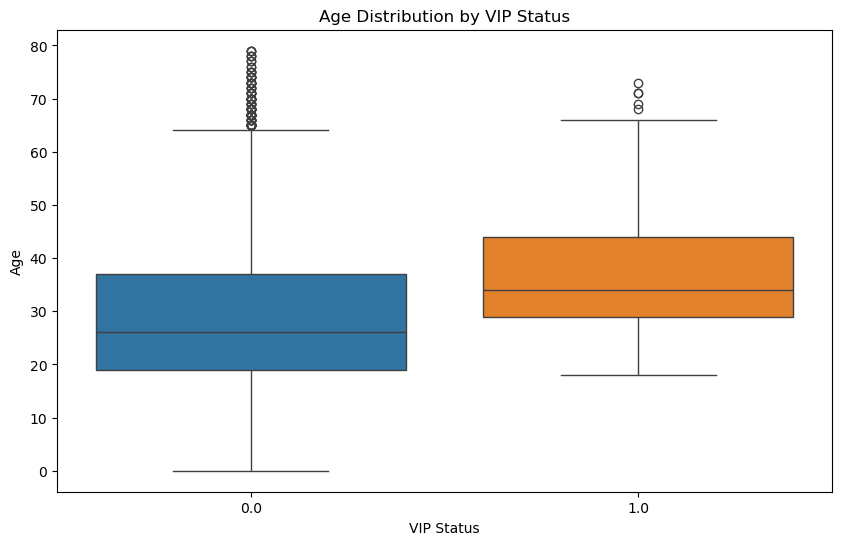

In [1211]:
# Create a boxplot
custom_palette = ["#1f77b4", "#ff7f0e"]  # Add more colors if needed
plt.figure(figsize=(10, 6))
sns.boxplot(x='VIP', y='Age', data=train_df, palette=custom_palette)
plt.title('Age Distribution by VIP Status')
plt.xlabel('VIP Status')
plt.ylabel('Age')
plt.show()

**Observation**  
💡As expected, the higher the age the more chance of passenger buying a VIP shown by the higher median and interquartile range.

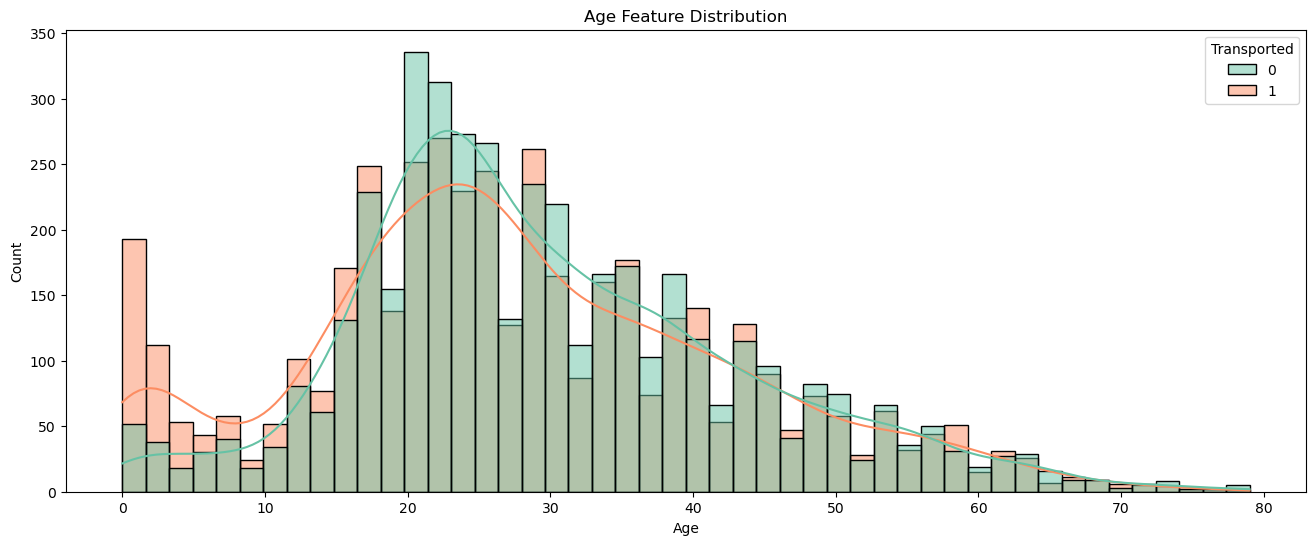

In [1212]:
plt.figure(figsize=(16,6))
sns.histplot(x=train_df["Age"],hue="Transported",data=train_df,kde=True,palette="Set2")
plt.title("Age Feature Distribution")
plt.show()

**Observation**  
💡 Most of the passengers were between age 18-32.  
💡 Age from 0-18 passengers are highly transported when compared with not transported passengers espically for those who were new born.  
💡 Age from 18-32 passengers are comparatively less transported when compared to not transported passengers.  
💡 Age above 32 seems to be equally transported when compared to not transported passengers.  

**Insights**  
💡 I can create a new feature Age-Catgeory from age in which we can split ages into different categories.

### Visualising the amenety features (RoomService, FoodCourt, ShoppingMall, Spa, VRDeck) 

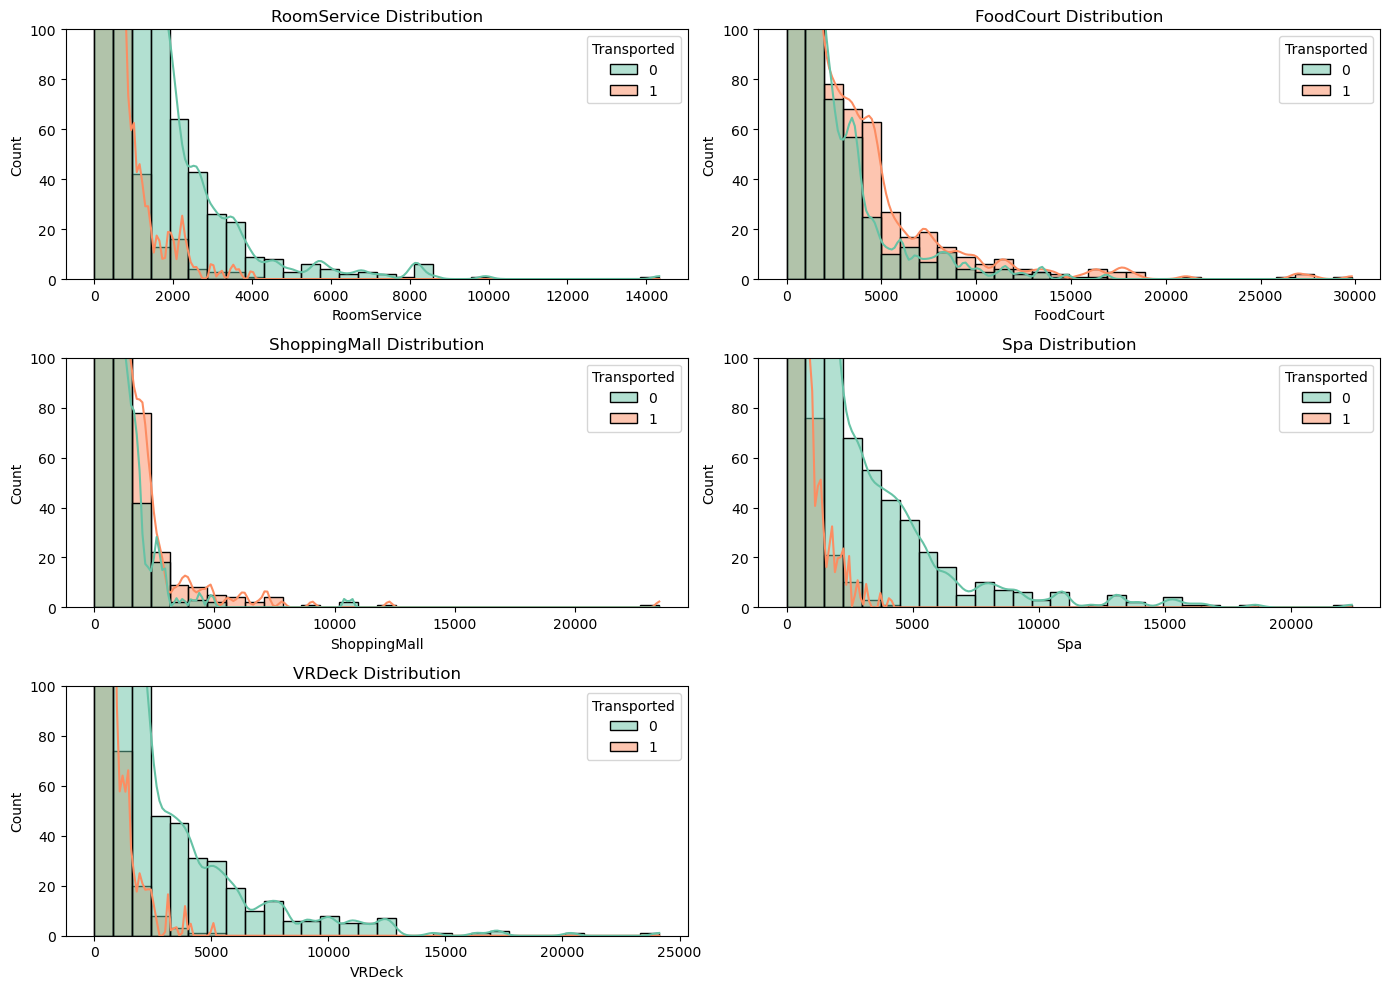

In [1213]:
exp_cols = ["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]

plt.figure(figsize=(14,10))
for idx,column in enumerate(exp_cols):
    plt.subplot(3,2,idx+1)
    sns.histplot(x=column, hue="Transported", data=train_df,bins=30,kde=True,palette="Set2")
    plt.title(f"{column} Distribution")
    plt.ylim(0,100)
    plt.tight_layout()

**Observation**  
💡 I can observe that most of the passengers doesn't seem to spend any money.   
💡 Since most of the expenses are 0 the values with higher expenses are kind of outliers in our data and have had to be cut out from the histogram plot.  
💡 It seems that RoomService,Spa & VRDeck seem to have similar distributions.  
💡 FoodCourt & ShoppingMall have similar kinds of similar distributions.  
💡 All the expenditure features distribution is Right-Skewed.  
💡 Passengers having less expenses are more likely to be transported than passengers having high expenses.  

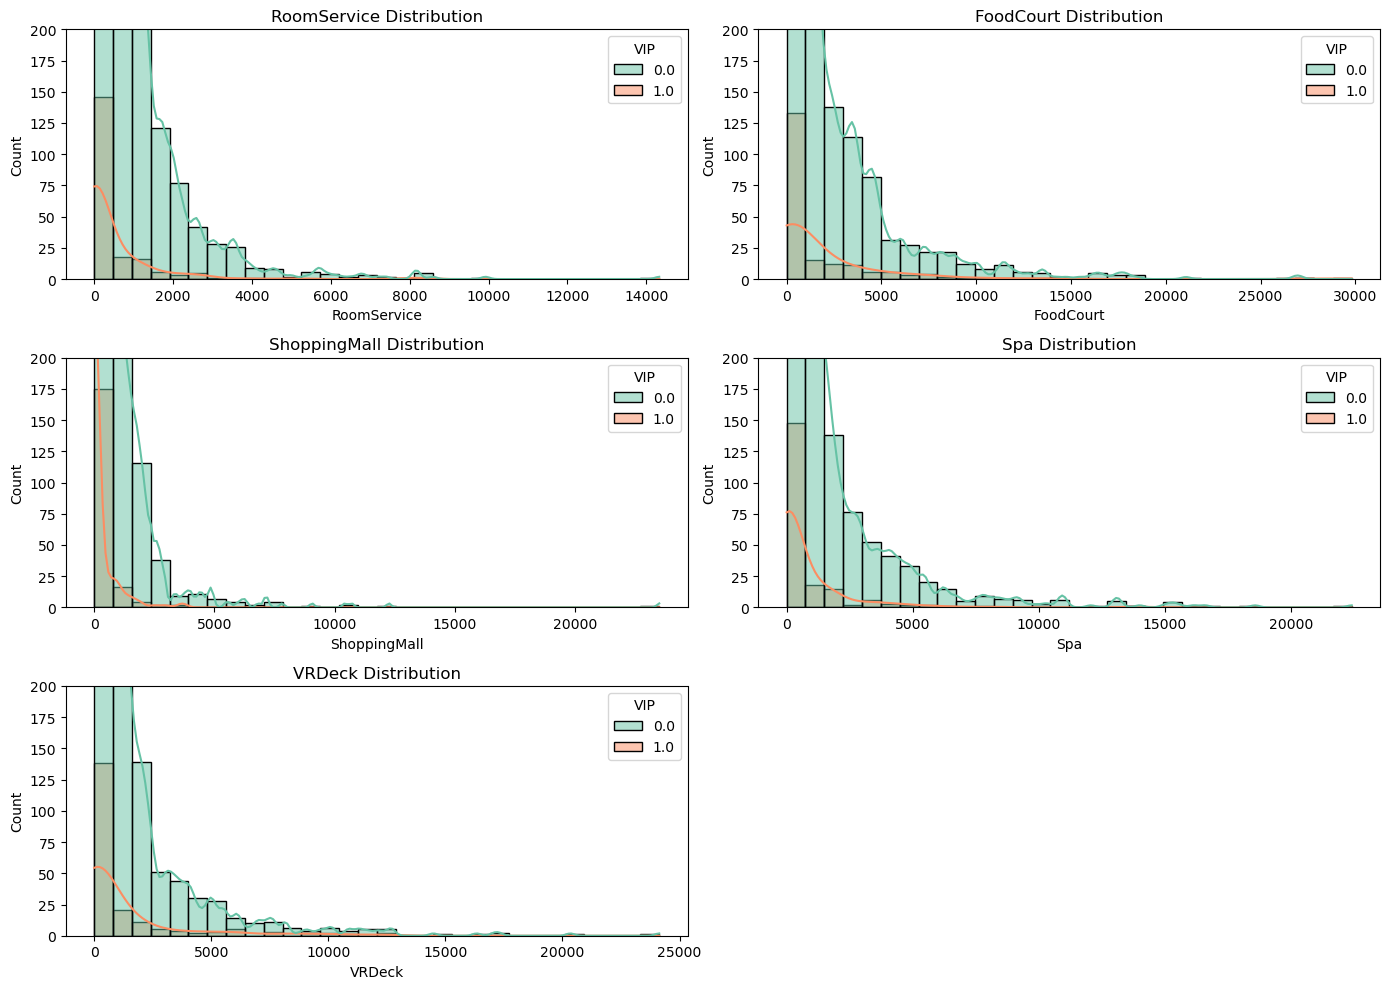

In [1214]:
exp_cols = ["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]

plt.figure(figsize=(14,10))
for idx,column in enumerate(exp_cols):
    plt.subplot(3,2,idx+1)
    sns.histplot(x=column, hue="VIP", data=train_df,bins=30,kde=True,palette="Set2")
    plt.title(f"{column} Distribution")
    plt.ylim(0,200)
    plt.tight_layout()

**Observation**  
💡 VIP passengers spend more money than non-VIP passengers. 

**Insights**  
💡 Since, all expenditure features are right-skewed distributions. So before Model Building I will transform these features to normal distribution using log-transformation.  
💡 I can create a new feature Total Expenditure indicating the total expenses of all different expenditures done by the passengers.  
💡 Since, most people expenditure is 0 I want to create a new boolean feature called "no spending" whiich demonstrates whether the passenger total expense is 0 or not.  

### Visualizing Categorical Features (HomePlanet, CryoSleep, Destination, VIP) 

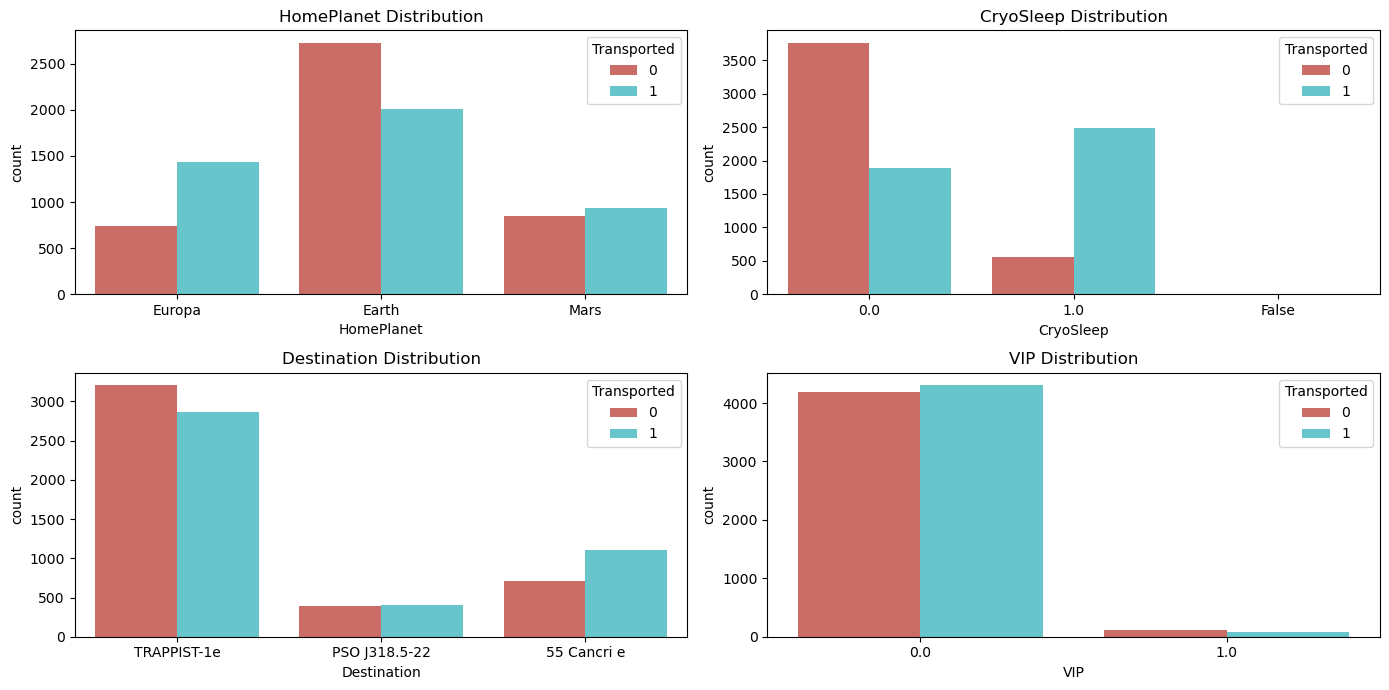

In [1215]:
cat_cols = ["HomePlanet","CryoSleep","Destination","VIP"]

plt.figure(figsize=(14,7))
for idx,column in enumerate(cat_cols):
    plt.subplot(2,2,idx+1)
    sns.countplot(x=column, hue="Transported", data=train_df, palette="hls")
    plt.title(f"{column} Distribution")
    plt.tight_layout()

**Observation**  
💡 In HomePlanet feature most of the passengers are from Earth but passengers from Earth are less succesfully to be Transported, passenger from Mars are Equally Transported, and passengers from Europa are Highly Transported.   
💡 In Destination feature most of the passengers are transported to Trappist-1e.   
💡 In VIP feature one cateogry is dominating others category too much. So it doesn't seem to be useful feature because it can lead to the model overfitting.   
💡 So it's better to drop VIP feature before Model building.  

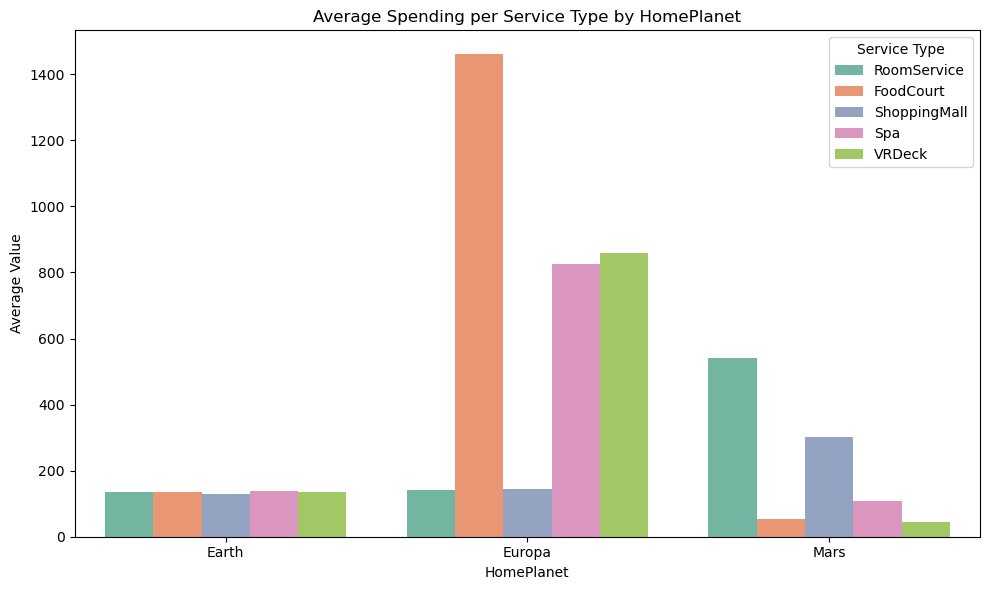

In [1216]:
ave_vals = train_df.groupby("HomePlanet")[["RoomService",'FoodCourt','ShoppingMall','Spa','VRDeck']].mean()
ave_vals = ave_vals.reset_index()
melted_vals = ave_vals.melt(id_vars="HomePlanet", value_vars=["RoomService",'FoodCourt','ShoppingMall','Spa','VRDeck'],
                            var_name="ServiceType", value_name="AverageValue")

# Plot the barplot with three values for each HomePlanet
plt.figure(figsize=(10, 6))
sns.barplot(x="HomePlanet", y="AverageValue", hue="ServiceType", data=melted_vals, palette="Set2")

# Set plot title and labels
plt.title("Average Spending per Service Type by HomePlanet")
plt.ylabel("Average Value")
plt.xlabel("HomePlanet")
plt.legend(title="Service Type")

plt.tight_layout()
plt.show()

**Observation**  
💡 It seems that people from Earth are very consistent on what they spend for their ameneties.  
💡 Passengers from Europa spend much higher on ameneties, especially on the foodcourt, spa and vrdeck. Could be because the journey is much longer for them.   
💡 Passengers from Mars are pretty varied on what they spend money on, but it seems that RoomService is the highest they spend on.   
💡 This distribution could demonstrate what type of people these people are from their homeplanet, could be more recluse from earth but more outgoing from Europa.   

## Feature Creation

Creating a new feature from the 'Age' Column, I want to create new features which are bins that are 1 or 0 if the passenger is within that specific age. 

In [1217]:
train_df['Age <= 10'] = train_df['Age'].apply(lambda row: 1 if row < 10 else 0)
test_df['Age <= 10'] = test_df['Age'].apply(lambda row: 1 if row < 10 else 0)

In [1218]:
# Define the age ranges
age_ranges = [(10, 20), (20, 30), (30, 40), (40, 50), (50, 60), (60, 70), (70, 80)]

# Iterate over each age range and create the new feature columns
for lower, upper in age_ranges:
    col_name = f'{lower} < Age <= {upper}'  # Dynamic column name
    train_df[col_name] = train_df['Age'].apply(lambda row: 1 if lower < row < upper else 0)
    test_df[col_name] = test_df['Age'].apply(lambda row: 1 if lower < row < upper else 0)


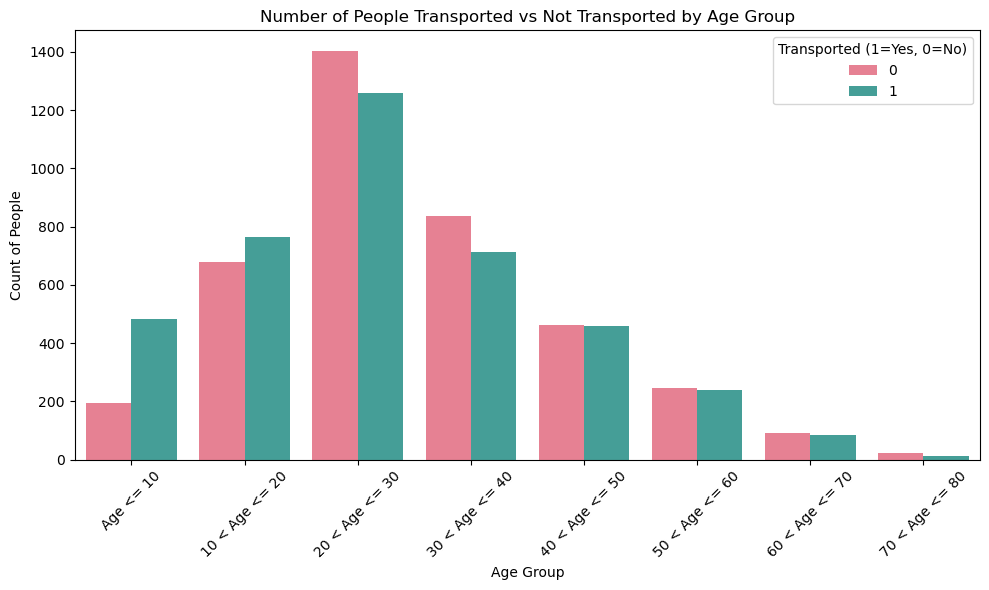

In [1219]:
age_cols = ['Age <= 10', '10 < Age <= 20', '20 < Age <= 30',
       '30 < Age <= 40', '40 < Age <= 50', '50 < Age <= 60', '60 < Age <= 70',
       '70 < Age <= 80', 'Transported']

# Subset the relevant columns from the DataFrame
age_df = train_df[age_cols]

# Melt the data to get a long format DataFrame
melted_age = age_df.melt(id_vars="Transported", value_vars=['Age <= 10', '10 < Age <= 20', '20 < Age <= 30',
            '30 < Age <= 40', '40 < Age <= 50', '50 < Age <= 60', 
            '60 < Age <= 70', '70 < Age <= 80'], 
            var_name="AgeGroup", value_name="IsInGroup")

# Filter the rows where 'IsInGroup' is 1 (i.e., the person belongs to the given age group)
melted_age = melted_age[melted_age['IsInGroup'] == 1]

# Group by AgeGroup and Transported to get counts of transported/not transported per age group
grouped = melted_age.groupby(['AgeGroup', 'Transported']).size().reset_index(name='Count')

last_two_rows = grouped.tail(2)
rest_of_df = grouped.iloc[:-2]
grouped = pd.concat([last_two_rows, rest_of_df], ignore_index=True)

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x='AgeGroup', y='Count', hue='Transported', data=grouped, palette='husl')

# Set plot title and labels
plt.title("Number of People Transported vs Not Transported by Age Group")
plt.ylabel("Count of People")
plt.xticks(rotation = 45)
plt.xlabel("Age Group")
plt.legend(title="Transported (1=Yes, 0=No)")

plt.tight_layout()
plt.show()

**Observations**  
💡 Most passengers travelling on the spaceship are between 20 and 30  
💡 The data is skewed to the right, with a lot more younger people are travelling compared to old people    
💡 The values for transported and not transported are very similar, there doesn't seem to be a strong bias between the two classes regardless of age.   

From the data description I know that each PassengerId column takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number of people within the group. I want to create a new feature Group_Size which will indicate total number of members present in each group and also if a passenger is travelling solo or not.

In [1220]:
capstone_utils.passengerid_new_features(train_df)
capstone_utils.passengerid_new_features(test_df)

I don't remember Group and Member features any more so I will drop these features from the dataset.  

In [1221]:
train_df.drop(columns=["Group","Member"],inplace=True)
test_df.drop(columns=["Group","Member"],inplace=True)

I want to create a new feature, which is the total expenditure for each passenger on the ameneties as I feel this will help feed into the accuracy of the model. 

In [1222]:
train_df['Total_Expenditure'] = train_df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)
test_df['Total_Expenditure'] = test_df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)

I want to extract some data from the Cabin feature, as I feel that this information may be quite helpful. Depending on what side a passenger is seating, what cabin and what deck may all help indicate if the passenger succesfully gets transported or not. 

In [1223]:
train_df['cabinSide'] = train_df.apply(lambda row: capstone_utils.cabin_side(row), axis = 1)
test_df['cabinSide'] = test_df.apply(lambda row: capstone_utils.cabin_side(row), axis = 1)

In [1224]:
train_df['cabinNum'] = train_df.apply(lambda row: capstone_utils.cabin_num(row), axis = 1)
test_df['cabinNum'] = test_df.apply(lambda row: capstone_utils.cabin_num(row), axis = 1)

In [1225]:
train_df['cabinDeck'] = train_df.apply(lambda row: capstone_utils.cabin_deck(row), axis = 1)
test_df['cabinDeck'] = test_df.apply(lambda row: capstone_utils.cabin_deck(row), axis = 1)

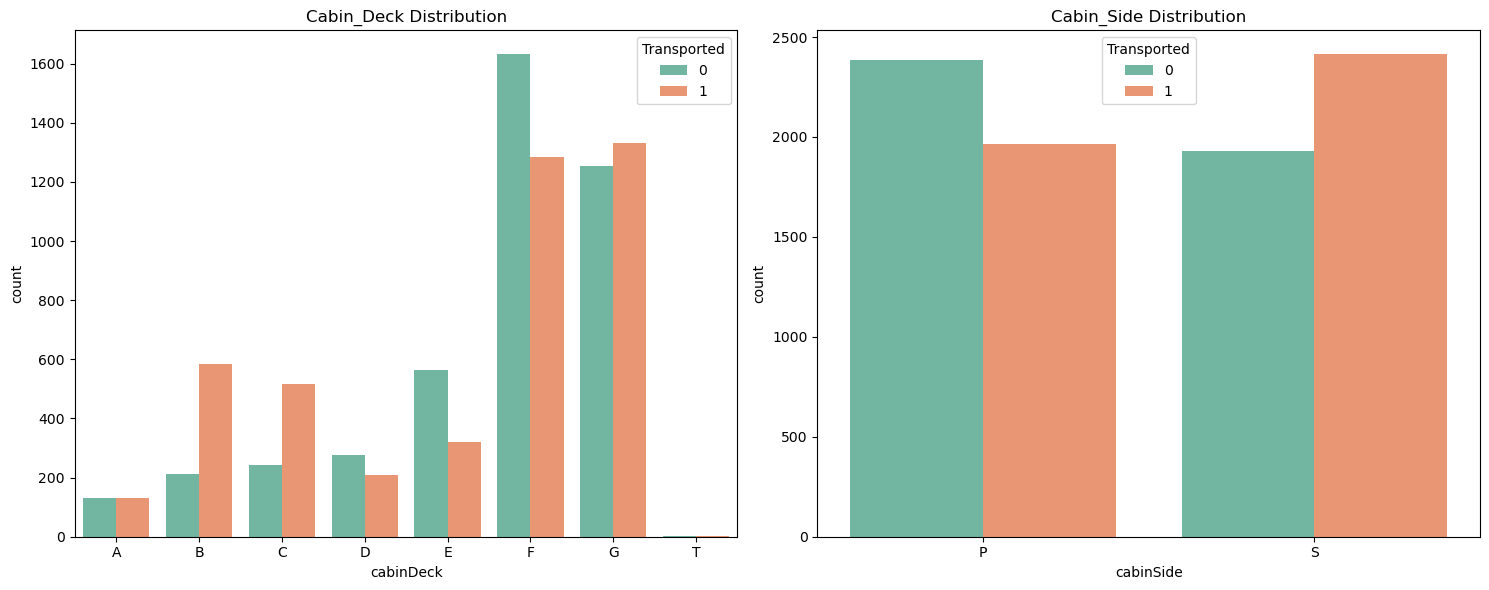

In [1226]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(x="cabinDeck",hue="Transported", data=train_df, palette="Set2",order=["A","B","C","D","E","F","G","T"])
plt.title("Cabin_Deck Distribution")

plt.subplot(1,2,2)
sns.countplot(x="cabinSide", hue="Transported", data=train_df, palette="Set2")
plt.title("Cabin_Side Distribution")
plt.tight_layout()
plt.show()

**Observations**  
💡 From Cabin_Deck I can observe that most of the passengers are from F & G Deck.  
💡 There are very few passengers in Cabin_Deck ,T.  
💡 Passengers from Cabin Deck B & C are very highly transported.  
💡 From Cabin_Side almost half passengers were from cabin side S and half from cabin side P.  
💡 But passenger from cabin_side S are more succesfully Transported but passengers from cabin_side P are Equally Transported    

Given these are categorical variables, I want to use one hot encoding so that I can split up these variables and convert them to binary so that they are more readable for the machine learning model and remove the non-numerical features from the dataframe. 

In [1227]:
#may have to convert to label encoding instead to speed up the process if one hot encoding produces too many variables 
train_df = pd.get_dummies(train_df, columns=['HomePlanet','Destination','cabinSide','cabinNum','cabinDeck'])
test_df = pd.get_dummies(test_df, columns=['HomePlanet','Destination','cabinSide','cabinNum','cabinDeck'])

### Data Pre-Processesing

After conducting EDA on my dataframe, I have found that the amenety features in my dataframe do not have normal distributions and are skewed to the right. I want to apply a log transformation to these features so that they are more normally distributed so that my machine learning models can be more accurate. 

In [1228]:
cols = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']

for value in cols:
    train_df[value] = np.log(1+train_df[value])
    test_df[value]=np.log(1+test_df[value])

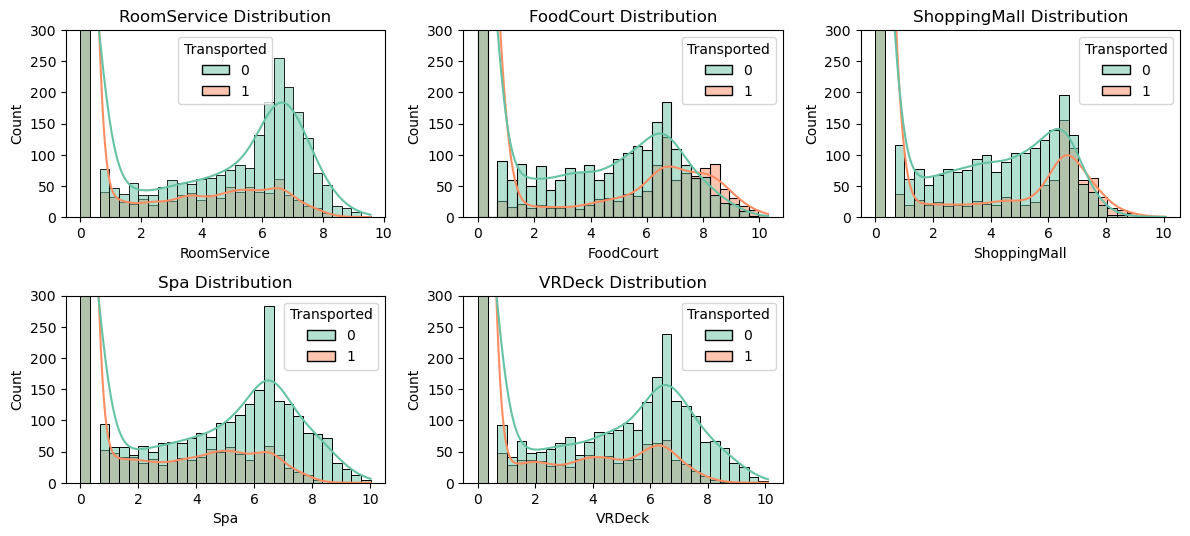

In [1229]:
#visualising the amenety columns to view post log transformation 
x = 0
plt.figure(figsize=(12,13))
for col in cols: 
    plt.subplot(5,3,x+1)
    sns.histplot(x=col, hue="Transported", data=train_df,bins=30,kde=True,palette="Set2")
    plt.title(f"{col} Distribution")
    plt.ylim(0,300)
    plt.tight_layout()
    x += 1

**Observations**  
💡 After applying log transformation to theses amenety features, I can see that the features are much more normally distributed than previously  
💡 There is still a skew due to the heavy amount of passengers that have spent no money on ameneties. 

In [1230]:
train_df.drop(['Age','Name','PassengerId','Cabin', 'VIP'],axis =1, inplace=True)
test_df.drop(['Age','Name','PassengerId','Cabin', 'VIP'],axis =1, inplace=True)

## Modelling

### Machine learning models

In [1231]:
train_df.at[4565, 'CryoSleep'] = 0
train_df['CryoSleep'] = train_df['CryoSleep'].astype(int)
train_df[train_df.select_dtypes(include=['bool']).columns] = train_df.select_dtypes(include=['bool']).astype(int)
test_df[test_df.select_dtypes(include=['bool']).columns] = test_df.select_dtypes(include=['bool']).astype(int)

In [1232]:
X = train_df.drop('Transported', axis = 1)
y = train_df['Transported']

In [1233]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [1234]:
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)
test_df = ss.transform(test_df)

Due to my utils file I created, I can run through a few basic models and determine which is the best performaning one.

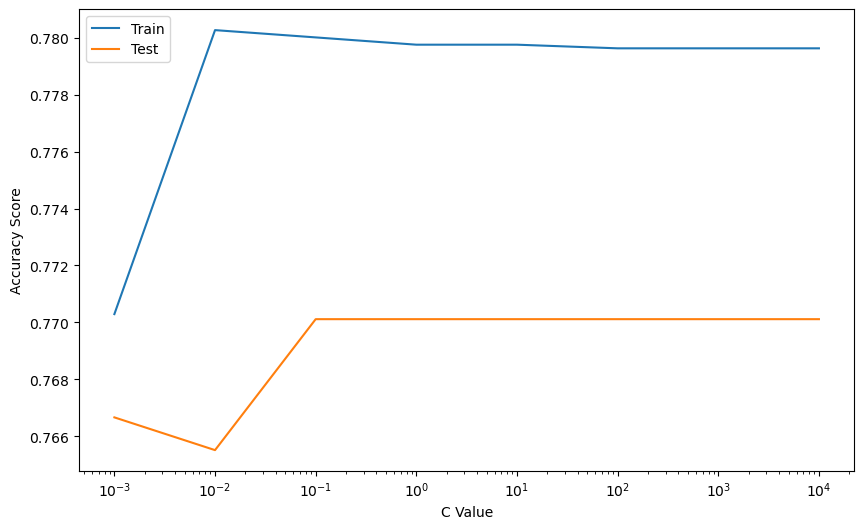

The C value which yielded the highest test accuracy was: 0.1, I will input this in my final model:
Train score: 0.780007669691934
Test score: 0.7701149425287356
              precision    recall  f1-score   support

           0       0.80      0.74      0.77       443
           1       0.75      0.80      0.77       427

    accuracy                           0.77       870
   macro avg       0.77      0.77      0.77       870
weighted avg       0.77      0.77      0.77       870



In [1235]:
logreg = capstone_utils.plot_model_result('logistic', X_train, X_test, y_train, y_test)

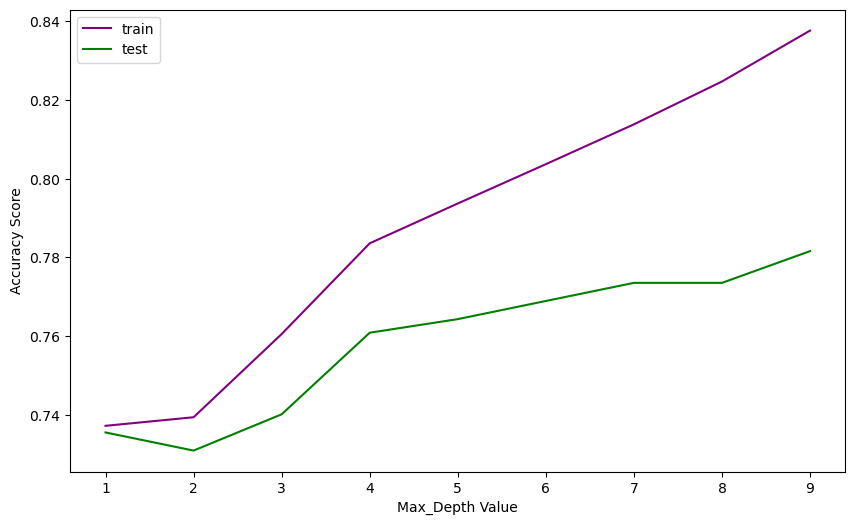

The max depth value which yielded the highest test accuracy was: 9, I will input this in my final model:
Train score: 0.8377860155950403
Test score: 0.7781609195402299
              precision    recall  f1-score   support

           0       0.80      0.75      0.77       443
           1       0.76      0.81      0.78       427

    accuracy                           0.78       870
   macro avg       0.78      0.78      0.78       870
weighted avg       0.78      0.78      0.78       870



In [1236]:
decision_mod = capstone_utils.plot_model_result('decision', X_train, X_test, y_train, y_test)

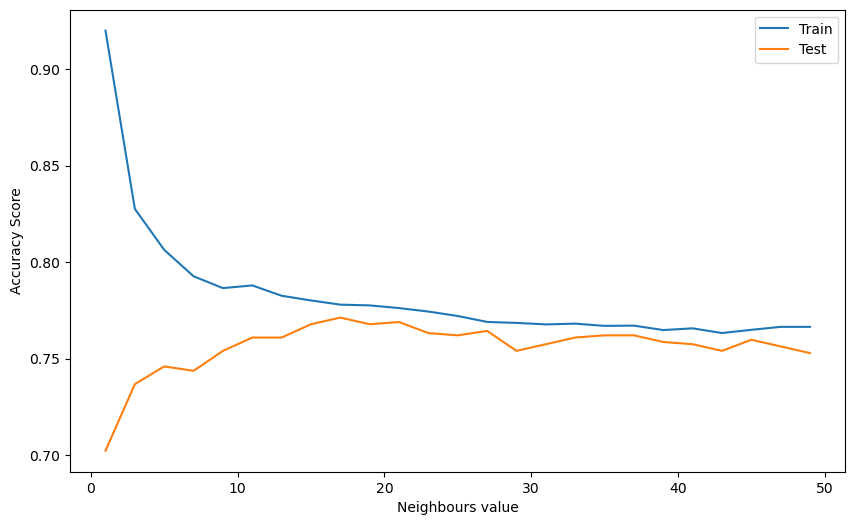

The neighbours value which yielded the highest test accuracy was: 17, I will input this in my final model:
Train score: 0.7779624185095232
Test score: 0.771264367816092
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       443
           1       0.78      0.74      0.76       427

    accuracy                           0.77       870
   macro avg       0.77      0.77      0.77       870
weighted avg       0.77      0.77      0.77       870



In [1237]:
knear_mod = capstone_utils.plot_model_result('knearest', X_train, X_test, y_train, y_test)

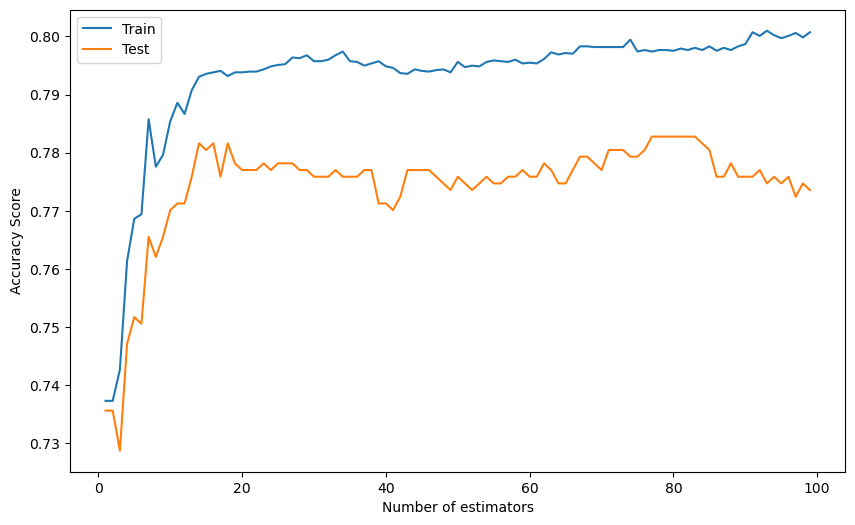

The number of trees which yielded the highest test accuracy was: 77, I will input this in my final model:
Train score: 0.7973923047424262
Test score: 0.7827586206896552
              precision    recall  f1-score   support

           0       0.83      0.72      0.77       443
           1       0.74      0.85      0.79       427

    accuracy                           0.78       870
   macro avg       0.79      0.78      0.78       870
weighted avg       0.79      0.78      0.78       870



In [1238]:
ada_mod = capstone_utils.plot_model_result('adaboost', X_train, X_test, y_train, y_test)

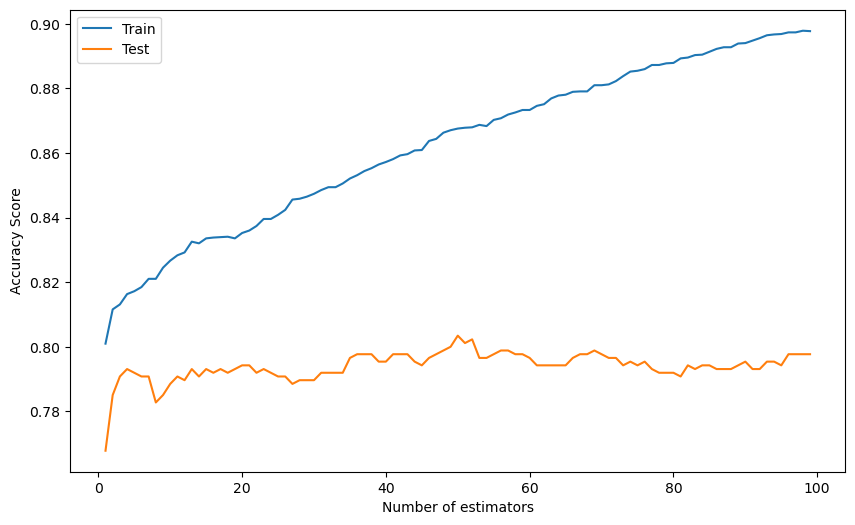

The number of trees which yielded the highest test accuracy was: 50, I will input this in my final model:
Train score: 0.8675699859388981
Test score: 0.803448275862069
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       443
           1       0.78      0.84      0.81       427

    accuracy                           0.80       870
   macro avg       0.80      0.80      0.80       870
weighted avg       0.81      0.80      0.80       870



In [1239]:
xgb_mod = capstone_utils.plot_model_result('xgboost', X_train, X_test, y_train, y_test)

### Explore XGBoost classifier model 

Although the XGBoost plot doesn't show intial promise, the starting accuracy for the test set is 78%. This is one of the highest values out of all the models so I want to explore this further to see if I can increase the accuracy. Also, given the fact there are so many categorical features present in the dataframe, XGboost models are the best for using categorical features in their classification predictions. So I would like to explore this further.

In [1240]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Create the XGBoost classifier
xgb_model = XGBClassifier(eval_metric='mlogloss')

# Define the parameter grid for XGBoost
param_grid = {
    'colsample_bytree': [0.8],
    'max_depth': [6],
    'n_estimators' : [x for x in range(0,300,50)],
    'min_child_weight': [4],
    'subsample': [0.8],
    'learning_rate': [x for x in np.arange(0.1,0.5,0.1)]
}

# Setup the GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, 
                           param_grid=param_grid, 
                           scoring='accuracy', 
                           cv=5, 
                           verbose=1)

# Fit the model
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.8],
                         'learning_rate': [0.1, 0.2, 0.30000000000000004, 0.4],
                         'max_depth': [6], 'min_child_weight': [4],
                         'n_estimators': [0, 50, 100, 150, 200, 250],
                         'subsample': [0.8]},
             scoring='accuracy', verbose=1)

In [1241]:
print("Best set of hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best set of hyperparameters:  {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 4, 'n_estimators': 100, 'subsample': 0.8}
Best score:  0.807620012583447


In [1242]:
xgb_model = grid_search.best_estimator_
y_test_predictions = xgb_model.predict(X_test)

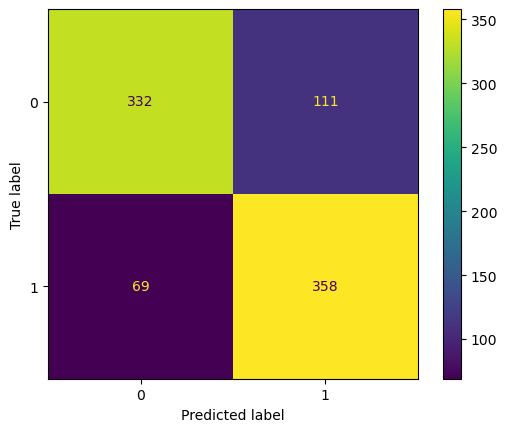

The accuracy of the model is : 0.7931034482758621
The precision of the model is : 0.7633262260127932
The recall of the model is : 0.8384074941451991
The f1 of the model is : 0.7991071428571429


In [1243]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_test_predictions)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

print('The accuracy of the model is : '+ str(metrics.accuracy_score(y_test, y_test_predictions)))
print('The precision of the model is : '+ str(metrics.precision_score(y_test, y_test_predictions)))
print('The recall of the model is : '+ str(metrics.recall_score(y_test, y_test_predictions)))
print('The f1 of the model is : '+ str(metrics.f1_score(y_test, y_test_predictions)))

Above demonstrates the performance of the model on the test portion of the training data. It seems to be performing quite well, with an f1 score of 80% which is quite impressive. There are much less false negative values compared to false positive values. 

In [1244]:
predictions = xgb_model.predict(test_df)

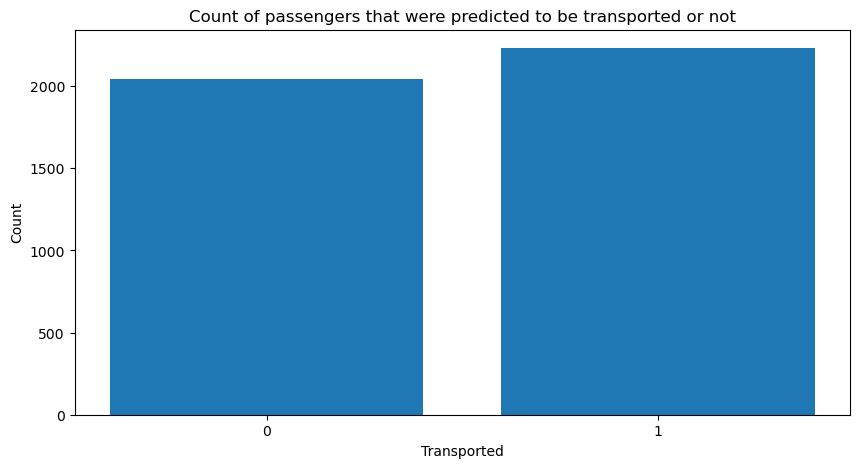

In [1245]:
unique_values, counts = np.unique(predictions, return_counts=True)
value_counts = dict(zip(unique_values, counts))
plt.figure(figsize = (10,5))
plt.bar(range(len(value_counts)), list(value_counts.values()), align='center')
plt.xlabel("Transported")
plt.ylabel('Count')
plt.xticks(range(len(value_counts)), list(value_counts.keys()))
plt.title('Count of passengers that were predicted to be transported or not')
plt.show()

### Formatting Final Predictions

I want to convert the predictions made by the model into the specific format that kaggle will be able to accept.

In [1246]:
final_submission = pd.DataFrame(passengers)
final_submission['predictions'] = predictions
final_submission['predictions'].value_counts()
final_submission = final_submission.replace({1:True, 0:False})
final_submission = final_submission.rename(columns={'predictions':"Transported"})
final_submission.to_csv('final_sub.csv', index=False)

## Conclusion

### Titanic Spaceship Project  

💡 The main objective of this project was to predict whether the passengers will be transported to alternate dimensions or not using the independent features given.  

**Key-Points**  

💡 There were a few very few useful features in the dataset which helped the model with its predictions.  
💡 With the data given, I was able to glean out new information and features that I feel were very useful for the model in its predictions.  
💡 I used different classifiers machine learning techniques for predictions and chose the most optimal one for further exploration.   
💡 Then I have compared all the preddictions given by different classifier models and selected the most optimal model.  
💡 To reduce overfitting from the model I conducted Hyper-Parameter Tunning on my highest performing model - xgboost models.  
💡 Finally, I used the most optimal model found through my gridsearch to make predictions on the test dataset. 